# Feature Engineering

Sometimes the features you have available in your initial data have little predictive strength when used in the most straightforward way.  This might be true almost regardless of choice of model class and hyperparameters.  And yet it might also be true that there are synthetic features latent in the data that are highly predictive, but that have to be *engineered* (mechanically, rather than sample-wise modification) to produce powerful features.

At the same time, a highly dimension model—whether of high dimension because of the initial data collection or because of creation of extra synthetic features—may lend itself less well to modeling techniques.  In these cases, it can be more computationally tractable, as well as more predictive, to work with a subset of all available features.

This is the last of three parts that can be thought of broadly as "Feature Engineering." This part focuses on *scaling* which does not discard dimensions, but does help in providing them with relevant numeric properties for best use in models.

In [1]:
# Some libraries tend to be in flux for their dependency versions
import warnings
warnings.simplefilter("ignore")

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split

%matplotlib inline

## Scaling

We have seen at several places the passing use of scaling to make data better regularized to allow models to perform best.  Scikit-learn provides several scaler classes that follow a similar API as models and other feature transformations.  Using these is mostly a simple drop-in step.

To make examples simple, we generate a small amount of random data with values of "features" in somewhat different ranges and distributions.

In [2]:
rows = 100
test_data = np.empty((rows,4))
test_data[:,0] = np.random.random(rows) * 2 + 1.5 
test_data[:,1] = np.random.randn(rows)
test_data[:,2] = np.random.randint(-50, 25, rows)/10
test_data[:,3] = np.exp(np.random.random(rows)+1.5)
print(test_data[:5])

[[ 2.17141207 -1.01916135 -1.          5.54081785]
 [ 3.25499815 -0.87622044 -3.2         4.7253457 ]
 [ 2.91197793 -0.37082548 -4.1         4.50068832]
 [ 2.12442757 -0.19650105  2.1         6.11997334]
 [ 3.15726816  1.27049728 -3.5         8.80999949]]


In [3]:
pd.DataFrame(test_data).describe().head(3)

,0,1,2,3
count,100.000000,100.000000,100.000000,100.000000
mean,2.538257,-0.117574,-1.391000,7.641369
std,0.578177,1.088724,2.086711,2.433000


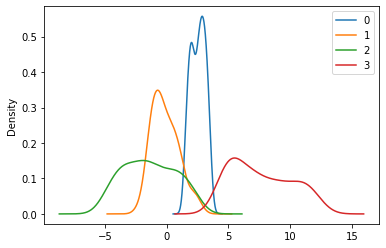

In [4]:
pd.DataFrame(test_data).plot(kind='kde');

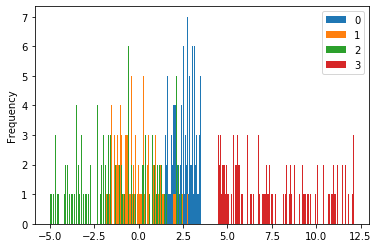

In [5]:
pd.DataFrame(test_data).plot(kind='hist', bins=300);

### StandardScaler

The most commonly used scaler—as the name indicates—is `StandardScaler`. 

This standardizes features by removing the mean and scaling to unit variance.  It loosely assumes that the underlying data is Gaussian to start with, but mostly it is fairly robust against moderate violations of that distribution.  Calculating the mean and standard deviation is per-column (as for all scalers).

In [6]:
from sklearn.preprocessing import StandardScaler
scaled1 = StandardScaler().fit_transform(test_data)
scaled1[:5]

array([[-0.63768225, -0.83228511,  0.18832018, -0.86770776],
       [ 1.2459018 , -0.70033156, -0.87128186, -1.20456772],
       [ 0.64963408, -0.23378453, -1.30475542, -1.29737049],
       [-0.71935481, -0.0728598 ,  1.68139579, -0.62846686],
       [ 1.07601901,  1.28137554, -1.01577305,  0.48274471]])

In [7]:
pd.DataFrame(scaled1).describe().head(3)

,0,1,2,3
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,2.933764e-16,-3.108624e-17,-3.397282e-16,1.713629e-15
std,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00


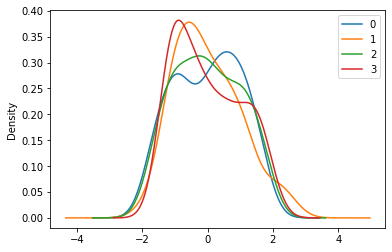

In [8]:
pd.DataFrame(scaled1).plot(kind='kde');

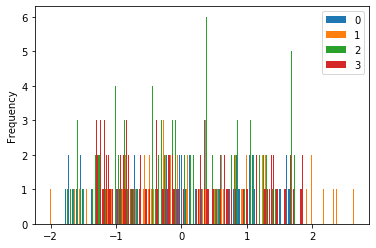

In [9]:
pd.DataFrame(scaled1).plot(kind='hist', bins=300);

### RobustScaler

This scales features using statistics that are robust to outliers. It removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

In [10]:
from sklearn.preprocessing import RobustScaler
scaled2 = RobustScaler().fit_transform(test_data)
scaled2[:5]

array([[-0.41642191, -0.43709374,  0.16666667, -0.40474759],
       [ 0.67125978, -0.34537041, -0.44444444, -0.60570184],
       [ 0.32694306, -0.02106502, -0.69444444, -0.66106345],
       [-0.46358399,  0.09079671,  1.02777778, -0.26202813],
       [ 0.57316042,  1.03215051, -0.52777778,  0.40086657]])

In [11]:
pd.DataFrame(scaled2).describe().head(3)

,0,1,2,3
count,100.000000,100.000000,100.000000,100.000000
mean,-0.048190,0.141443,0.058056,0.112885
std,0.580362,0.698620,0.579642,0.599557


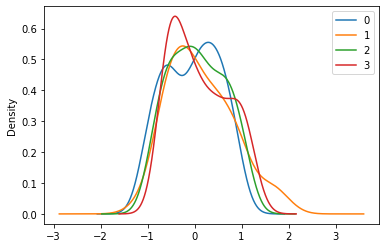

In [12]:
pd.DataFrame(scaled2).plot(kind='kde');

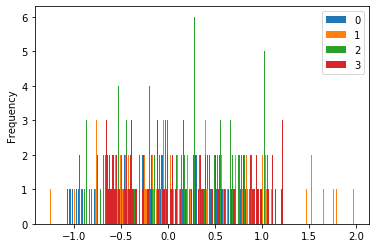

In [13]:
pd.DataFrame(scaled2).plot(kind='hist', bins=300);

### MinMaxScaler

Transforms features by scaling each feature to a given range. This estimator scales and translates each feature individually such that it is in the given range on the training set, by default between zero and one.

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaled3 = MinMaxScaler().fit_transform(test_data)
scaled3[:5]

array([[3.30218946e-01, 2.53632797e-01, 5.40540541e-01, 1.36554215e-01],
       [8.76846517e-01, 2.81965561e-01, 2.43243243e-01, 2.98789748e-02],
       [7.03805990e-01, 3.82141471e-01, 1.21621622e-01, 4.90626594e-04],
       [3.06517070e-01, 4.16694860e-01, 9.59459459e-01, 2.12315908e-01],
       [8.27545494e-01, 7.07473173e-01, 2.02702703e-01, 5.64209207e-01]])

In [15]:
pd.DataFrame(scaled3).describe()

,0,1,2,3
count,100.000000,100.000000,100.000000,100.000000
mean,0.515278,0.432339,0.487703,0.411336
std,0.291668,0.215799,0.281988,0.318271
min,0.000000,0.000000,0.000000,0.000000
25%,0.259952,0.257390,0.243243,0.130038
50%,0.539497,0.388648,0.459459,0.351412
75%,0.762514,0.566283,0.729730,0.660881
max,1.000000,1.000000,1.000000,1.000000


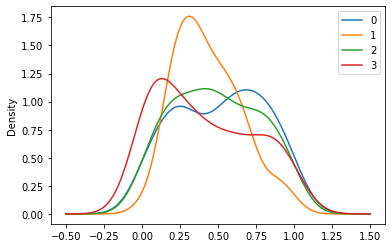

In [16]:
pd.DataFrame(scaled3).plot(kind='kde');

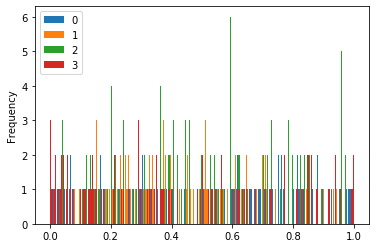

In [17]:
pd.DataFrame(scaled3).plot(kind='hist', bins=300);